In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

from library.regression import LinearRegression
from library.selection import StepwiseSelection
from library.selection import Importance
from library.design_matrix import design_matrix
from sklearn.preprocessing import LabelEncoder

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# https://www.kaggle.com/neuromusic/avocado-prices
data = pd.read_csv('data/avocado.csv')

In [3]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
data['type'].value_counts()
# There are two type: conventional and organic. There numbers are similar.

conventional    9126
organic         9123
Name: type, dtype: int64

In [5]:
data['year'].value_counts()
# There are four years and the number of 2018 is especially small.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [6]:
data['region'].value_counts()
# The numbers are balanced.

StLouis                338
SouthCarolina          338
GrandRapids            338
California             338
PhoenixTucson          338
Nashville              338
Roanoke                338
Portland               338
Boston                 338
LosAngeles             338
Seattle                338
HarrisburgScranton     338
RaleighGreensboro      338
Boise                  338
Plains                 338
Louisville             338
Orlando                338
Syracuse               338
SouthCentral           338
Atlanta                338
Denver                 338
HartfordSpringfield    338
NewYork                338
Spokane                338
TotalUS                338
Albany                 338
Tampa                  338
Jacksonville           338
LasVegas               338
Columbus               338
BaltimoreWashington    338
NorthernNewEngland     338
SanFrancisco           338
Indianapolis           338
GreatLakes             338
Northeast              338
West                   338
P

In [7]:
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

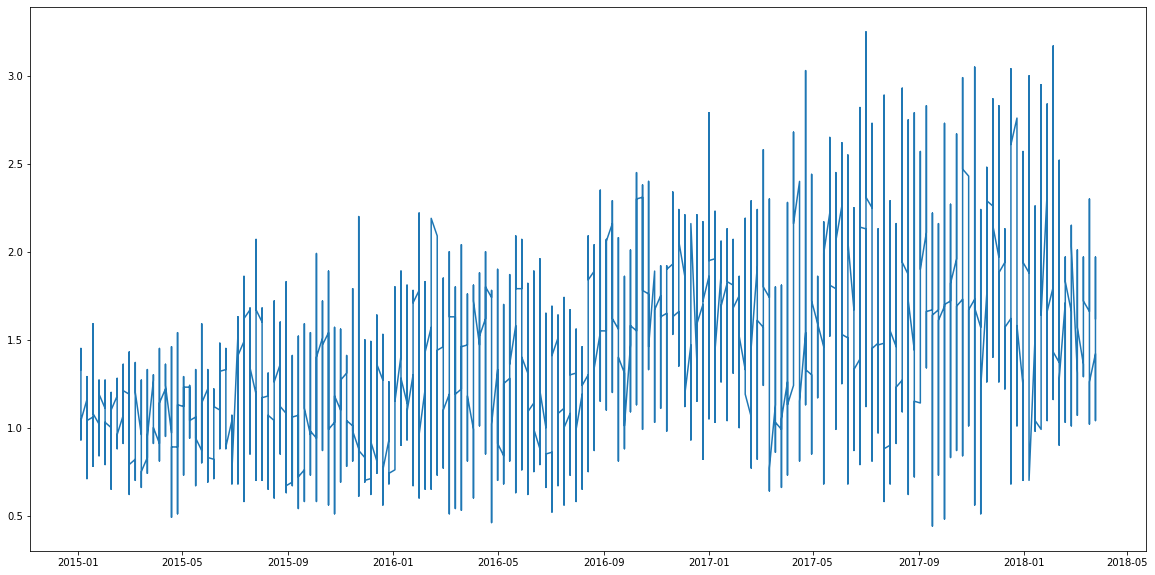

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data['Date'].sort_values(), data['AveragePrice'])
plt.show()
# The price generally increases and is more fluctuated after 2016-09 

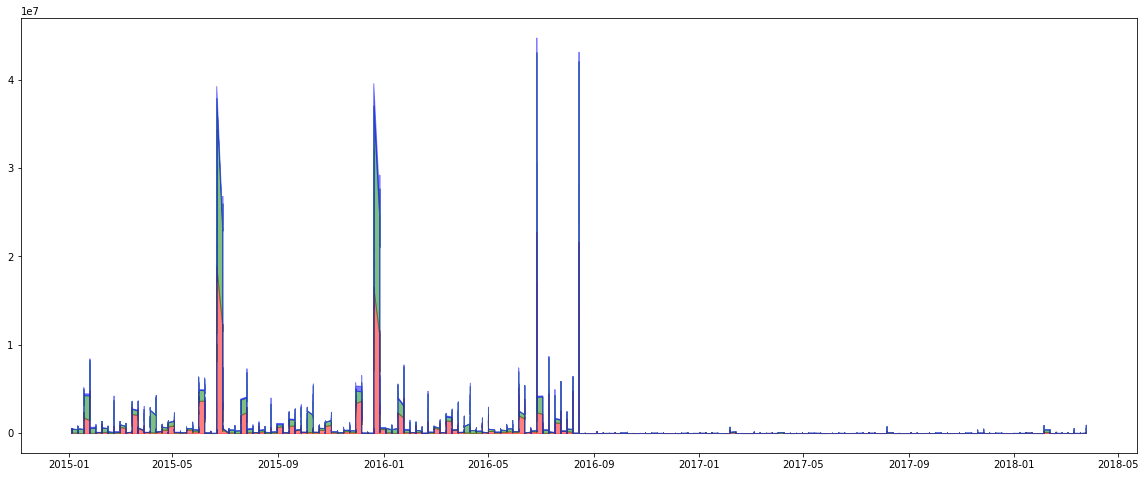

In [10]:
columns = ['4046', '4225', '4770']
colors = ['r', 'g', 'b']
y = np.zeros(len(data))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
for i in range(len(columns)):
    yp = np.copy(y)
    y += np.array(data[columns[i]])
    ax.fill_between(data['Date'].sort_values(), yp, y, color = colors[i], alpha = 0.5)
plt.show()
# The voulume decreases a lot after 2016-09

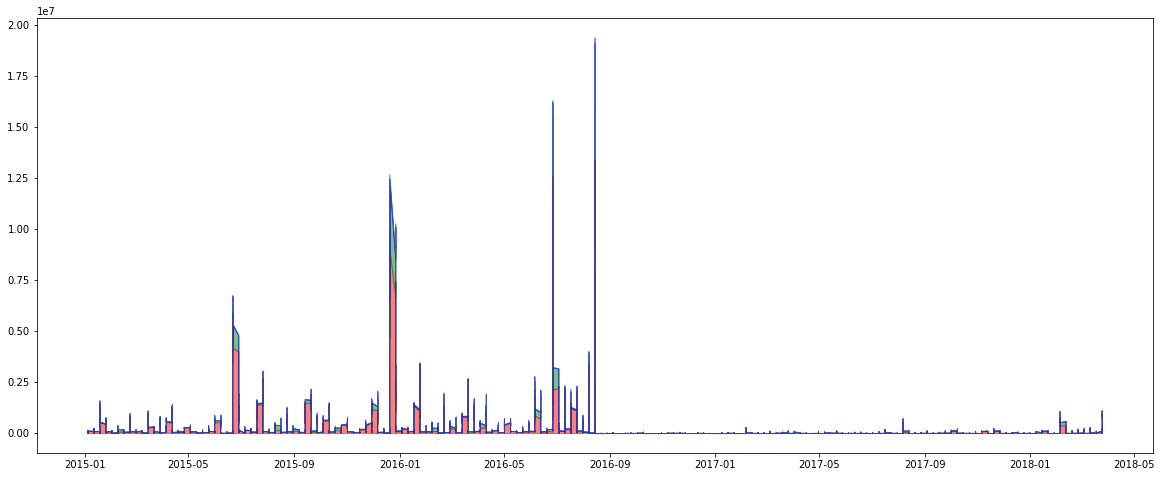

In [11]:
columns = ['Small Bags', 'Large Bags', 'XLarge Bags']
colors = ['r', 'g', 'b']
y = np.zeros(len(data))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
for i in range(len(columns)):
    yp = np.copy(y)
    y += np.array(data[columns[i]])
    ax.fill_between(data['Date'].sort_values(), yp, y, color = colors[i], alpha = 0.5)
plt.show()
# The number decreases a lot after 2016-09 
# The pattern is similar to the volume

In [12]:
data['type'] = data['type'].astype('category')
data['year'] = data['year'].astype('category')
data['region'] = data['region'].astype('category')

In [13]:
# The column is the index column
data = data.drop('Unnamed: 0', axis = 1)

In [14]:
# Try to make the things simple
data = data.drop(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1)

In [15]:
# Try to drop the date
data = data.drop('Date', axis = 1)

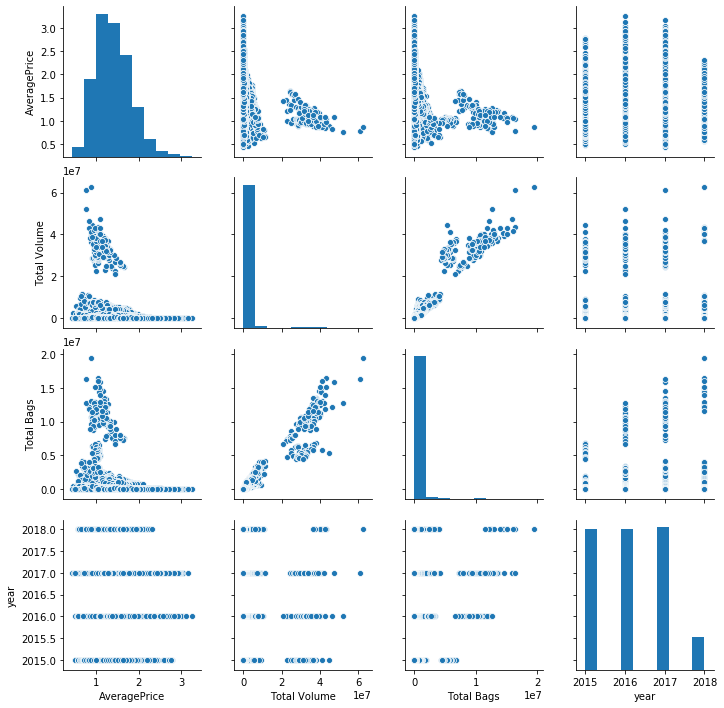

In [16]:
sns.pairplot(data)
plt.show()
# Total volume and total bags are highly correlated.

In [17]:
model = LinearRegression(data)
model.fit(['Total Volume', 'Total Bags', 'type', 'year', 'region'], 'AveragePrice', 
          category = ['type', 'year', 'region'], ascending = False)

In [18]:
model.summary(VIF = True)

Factor                                                 Coefficient         Pr(|t|>0)           VIF            
Intercept                                              1.2867              0.0000                             
Total Volume                                           -0.0000             0.0002              15.6331        
Total Bags                                             0.0000              0.0089              14.9632        
type_organic                                           0.4912              0.0000              -0.9360        
year_2016                                              -0.0388             0.0000              -1.4747        
year_2017                                              0.1373              0.0000              -1.3519        
year_2018                                              -0.0305             0.0002              -4.7677        
region_Atlanta                                         -0.2228             0.0000              -3.8122        
r

In [19]:
model = LinearRegression(data)
model.fit(['Total Volume', 'Total Bags', 'type', 'year', 'region'], 'AveragePrice', 
          category = ['type', 'year', 'region'], 
          interaction = [['type', 'Total Volume'], ['type', 'Total Bags'], ['type', 'year'], ['type', 'region'],
                         ['year', 'Total Volume'], ['year', 'Total Bags'], ['year', 'region'],
                         ['region', 'Total Volume'], ['region', 'Total Bags']], ascending = False)

In [20]:
model.summary()

Factor                                                 Coefficient         Pr(|t|>0)                          
Intercept                                              1.3415              0.0000                             
Total Volume                                           -0.0000             0.0474                             
Total Bags                                             0.0000              0.9549                             
type_organic                                           0.4910              0.0000                             
year_2016                                              0.1267              0.0000                             
year_2017                                              0.2397              0.0000                             
year_2018                                              0.1263              0.0148                             
region_Atlanta                                         0.2259              0.0324                             
r

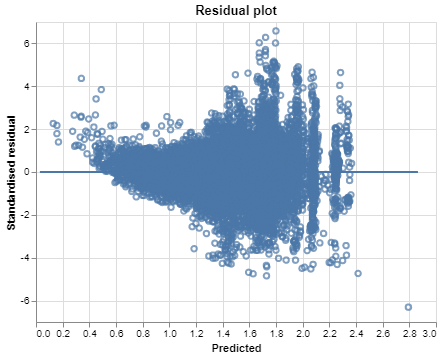

In [21]:
model.residual_plot()
# The plot likely has a shape

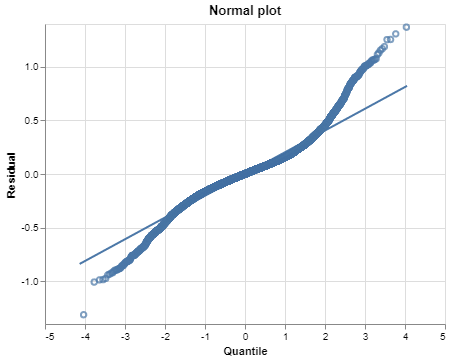

In [22]:
model.normal_plot()
# It is heavy-tailed

In [23]:
model.normal_test()
# The normality assumption fails

Test                               Test Statistic           Pr                  
Shapiro-Wilk                       0.9508                   0.0000              
Kolmogorov-Smirnov                 0.3246                   0.0000              
D’Agostino’s K^2                   1758.5313                0.0000              


C:\Users\anson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
model.hypothesis_testing([{'type_organic_year_2018' : 1}, {'type_organic_year_2017' : 1}, {'type_organic_year_2016' : 1}], [0, 0, 0])
# The interaction between year and type is significant

Test statistic: 302.58302480103487
Pr: 1.1102230246251565e-16


In [25]:
type_region = [ ]
for col in model.columns.get('x'):
    if 'type' in col and 'region' in col:
        type_region.append({col : 1})

In [26]:
model.hypothesis_testing(type_region, [0] * len(type_region))
# The interaction effect between type and region is significant.

Test statistic: 13.985876202917174
Pr: 1.1102230246251565e-16


In [27]:
year_region = [ ]
for col in model.columns.get('x'):
    if 'year' in col and 'region' in col:
        year_region.append({col : 1})

In [28]:
model.hypothesis_testing(year_region, [0] * len(year_region))
# The interaction effect between year and region is significant

Test statistic: 12.518835255611124
Pr: 1.1102230246251565e-16


In [29]:
data = data[data['Total Bags'] != 0]
data = data.reset_index(drop=True)
data['log_total_volume'] = np.log(data['Total Volume'])
data['log_total_bag'] = np.log(data['Total Bags'])
data = data.drop(['Total Volume', 'Total Bags'], axis = 1)

In [30]:
model = LinearRegression(data)
model.fit(['log_total_volume', 'log_total_bag', 'type', 'year', 'region'], 'AveragePrice',
           category = ['type', 'year', 'region'], 
           interaction = [['type', 'log_total_volume'], ['type', 'log_total_bag'], ['type', 'year'], ['type', 'region'],
                          ['year', 'log_total_volume'], ['year', 'log_total_bag'], ['year', 'region'],
                          ['region', 'log_total_volume'], ['region', 'log_total_bag']], ascending = False)

In [31]:
model.summary()
# The r-square increases and AIC and BIC decrease

Factor                                                 Coefficient         Pr(|t|>0)                          
Intercept                                              4.7651              0.0000                             
log_total_volume                                       -0.2811             0.0000                             
log_total_bag                                          -0.0341             0.3345                             
type_organic                                           -2.0791             0.0000                             
year_2016                                              0.6210              0.0000                             
year_2017                                              2.2511              0.0000                             
year_2018                                              1.0556              0.0000                             
region_Atlanta                                         2.1889              0.0001                             
r

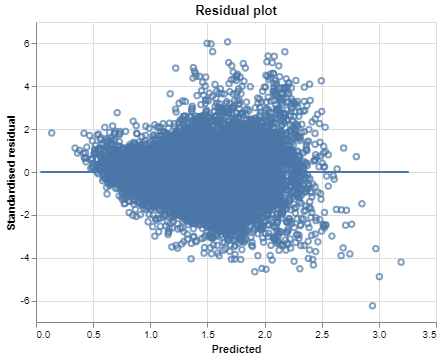

In [32]:
model.residual_plot()

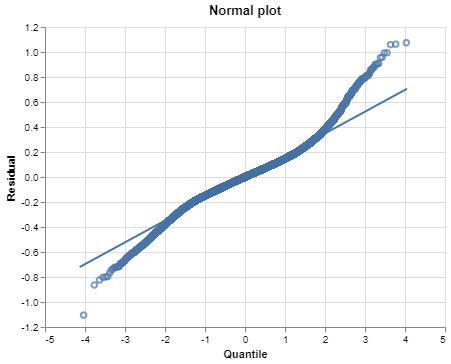

In [33]:
model.normal_plot()
# The plot fits better.

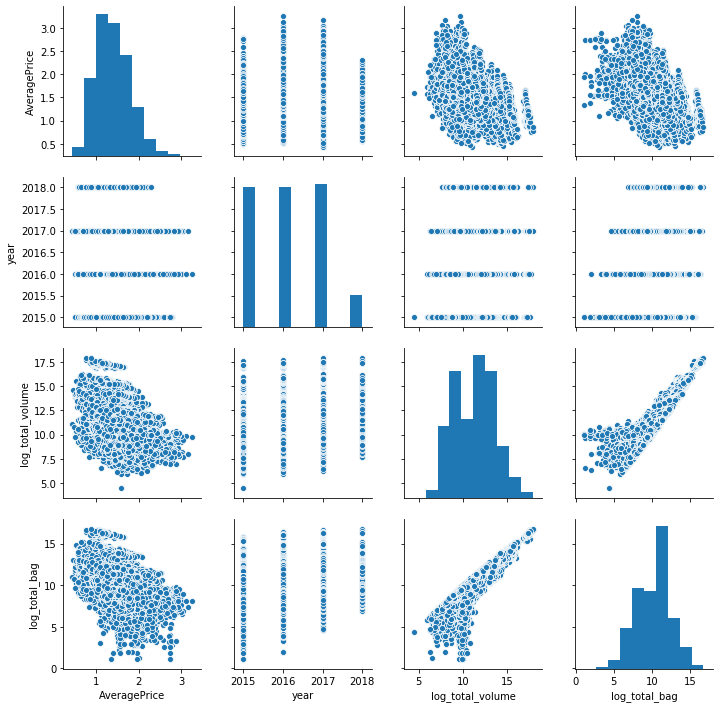

In [34]:
sns.pairplot(data)
plt.show()
# The scatter plot between price and total volume and that between price and total bags are more linear

In [35]:
# dm = design_matrix(data, intercept = False,
#            category = ['type', 'year', 'region'], 
#            interaction = [['type', 'log_total_volume'], ['type', 'log_total_bag'], ['type', 'year'], ['type', 'region'],
#                           ['year', 'log_total_volume'], ['year', 'log_total_bag'], ['year', 'region'],
#                           ['region', 'log_total_volume'], ['region', 'log_total_bag']], ascending = False, copy = True)

In [36]:
# StepwiseSelection(dm, list(dm.drop(['AveragePrice'], axis = 1).columns), 'AveragePrice')

In [38]:
Importance(data, ['log_total_volume', 'log_total_bag', 'type', 'year', 'region'], 'AveragePrice', 
           category = ['type', 'year', 'region'], ntree = 5000)

Features  Importance
2              type    0.379125
4            region    0.207563
0  log_total_volume    0.176663
1     log_total_bag    0.173418
3              year    0.063230